In [ ]:
from google.colab import drive
from keras.optimizers import Adam
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from numpy.core.defchararray import add

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform # Xavier's initialization
from keras.optimizers import SGD                         # Stochastic Gradient Descent
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/TA-02 /Data Sampel/fkrtl_not_transformation.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Load data set

data.drop(['Unnamed: 0', 'fkrtl-tanggal datang', 'FKRTL-ID Kunjungan', 'Nomor Peserta', 'fkrtl-tanggal pulang',
           'FKRTL-Provinsi Faskes', 'FKRTL-Kab/Kota Faskes', 'FKRTL-Provinsi Faskes Perujuk', 'FKRTL-Kab/Kota Faskes Perujuk', 
           'FKRTL-Kepemilikan Faskes Perujuk', 'FKRTL-Jenis Faskes Perujuk', 'FKRTL-Tipe Faskes Perujuk', 'Segmen Peserta yang Terdaftar', 
           'Kepemilikan Faskes yang Terdaftar', 'Jenis Faskes yang Terdaftar', 'Provinsi Peserta Terdaftar', 'Kab/Kota Peserta Terdaftar', 'fkrtl-Year',
          'FKRTL-Kode dan Nama Diagnosis Masuk', 'FKRTL-Kode dan Nama Diagnosis Sekunder', 'FKRTL-Kode dan Nama Diagnosis Primer', 'Status Kawin', 'Hubungan Keluarga',
          'fkrtl-Month', 'fkrtl-Hari Kunjungan', 'provinsi perujuk sama?', 'kab/kota perujuk sama?', 'Kelas Rawat Peserta', 'Umur', 'FKRTL-Biaya Verifikasi'], axis=1, inplace=True)

In [ ]:
data['fkrtl-Weekend?'] = data['fkrtl-Weekend?'].astype('category')
data['fkrtl-Quarter'] = data['fkrtl-Quarter'].astype('category')

In [ ]:
bins = np.linspace(min(data['FKRTL-Biaya Tagih']), max(data['FKRTL-Biaya Tagih']), 6)
kategori = ['sangat murah', 'murah', 'standar', 'mahal', 'sangat mahal']
data['biaya_tagih_binned'] = pd.cut(data['FKRTL-Biaya Tagih'], bins, labels=kategori, include_lowest=True)

bins = np.linspace(min(data['fkrtl-Lama Kunjungan']), max(data['fkrtl-Lama Kunjungan']), 6)
kategori = ['sangat sebentar', 'sebentar', 'standar', 'lama', 'sangat lama']
data['lama_kunjungan_binned'] = pd.cut(data['fkrtl-Lama Kunjungan'], bins, labels=kategori, include_lowest=True)


In [ ]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

In [ ]:
# Get dummies

X = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [ ]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

One Hot Encoding

In [ ]:
one_hot_encoder = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [ ]:
one_hot_encoder.shape

(906905, 70)

Autoencoder

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
normalized_df = scaler.fit_transform(one_hot_encoder)


In [ ]:
normalized_df.shape

(906905, 70)

SIMULASI 1
Train: 80%, Test: 20%

In [ ]:
train, test = train_test_split(normalized_df, test_size = 0.20)

In [ ]:
test.shape

(181381, 70)

In [ ]:
# AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)
input_df = Input(shape=(70,))  # The 31 features of our dataset

# Encoder
x = Dense(units=256, activation='relu')(input_df)
x = Dense(units=128, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=64, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=32, activation='relu', kernel_initializer='glorot_uniform')(x)

# Coded
encoded = Dense(10, activation='relu')(x)

# Decoder
h_decode = Dense(32, activation='relu')(encoded)
h_decode = Dense(64, activation='relu')(h_decode)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)

# we reconstruct the same number of features as the input
outputs = Dense(70, activation='linear')(h_decode)

# Autoencoder
autoencoder = Model(inputs=input_df, outputs = outputs)

# Encoder
encoder = Model(inputs = input_df, outputs = encoded)

# Optimizer / Update Rule
adam = Adam(lr=0.001)

# Compile the autoencoder model with adam optimizer and mean_squared_error
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = autoencoder.fit(x = train, y = train,
                    epochs=25,
                    batch_size=100,
                    validation_split=0.2)

Epoch 1/25
5805/5805 [==============================] - 38s 6ms/step - loss: -0.3945 - val_loss: -0.1264
Epoch 2/25
5805/5805 [==============================] - 37s 6ms/step - loss: -0.1649 - val_loss: -0.1217
Epoch 3/25
5805/5805 [==============================] - 37s 6ms/step - loss: -0.1290 - val_loss: -0.1276
Epoch 4/25
5805/5805 [==============================] - 40s 7ms/step - loss: -0.1294 - val_loss: -0.1276
Epoch 5/25
5805/5805 [==============================] - 37s 6ms/step - loss: -0.1294 - val_loss: -0.1276
Epoch 6/25
5805/5805 [==============================] - 37s 6ms/step - loss: -0.1294 - val_loss: -0.1276
Epoch 7/25
5805/5805 [==============================] - 38s 6ms/step - loss: -0.1294 - val_loss: -0.1276
Epoch 8/25
5805/5805 [==============================] - 38s 7ms/step - loss: -0.1294 - val_loss: -0.1276
Epoch 9/25
5805/5805 [==============================] - 37s 6ms/step - loss: -0.1294 - val_loss: -0.1276
Epoch 10/25
5805/5805 [==============================] 

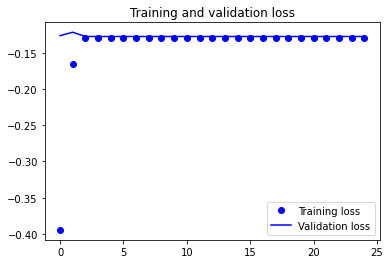

In [ ]:
# Use Autoencoder to reduce the number of features / dimensions
#testing
pred = encoder.predict(test)
X_std = train.std()
X_mean = train.mean()
for i in range(len(pred)):
    pred[i] = np.multiply(pred[i], X_std) + X_mean

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(25)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.close()